In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion
import matplotlib.pyplot as plt
from scipy import stats

# Доверительные интервалы доли. Тест первой недели 

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях. Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. 

In [2]:
n = 50
summ = 1

## Доля носителей варианта 1390Т
Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [3]:
alpha = 0.05
normal_interval = proportion_confint(summ, n, alpha, method = 'normal')
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


Есть проблема с использованием proportion_confint: грейдер не принимает ноль в качестве правильного ответа. Судя по всему, изменилось поведение библиотеки и отрицательная граница стала заменяться нулём:

```
if method in ['normal', 'agresti_coull']:
        ci_low = np.clip(ci_low, 0, 1)
        ci_upp = np.clip(ci_upp, 0, 1)
```
Чтобы этого избежать, пишем код вручную, на основе [документации](https://www.statsmodels.org/dev/_modules/statsmodels/stats/proportion.html#proportion_confint).

In [4]:
def old_proportion_normal_confint(count, nobs, alpha=0.05):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [5]:
normal_interval = old_proportion_normal_confint(summ, n, alpha)
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [-0.018805, 0.058805] with width 0.077611


## Доля носителей варианта 1390Т
В условиях предыдущей задачи постройте 95% доверительный интервал `Уилсона` для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

In [6]:
alpha = 0.05
wilson_interval = proportion_confint(summ, n, alpha, method = 'wilson')
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


## Объём выборки для заданной ширины

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

In [7]:
width = 0.01
mean = summ / n
alpha = 0.05
n_samples = int(np.ceil(samplesize_confint_proportion(mean, width, alpha)))
print('Объём выборки при заданных условиях', n_samples)

Объём выборки при заданных условиях 753


## Объём выборки для заданной ширины

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%? 

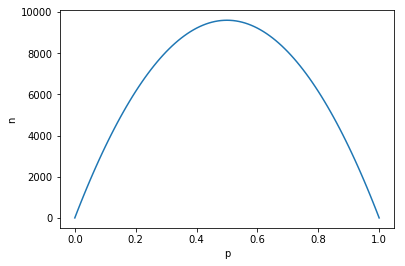

При значении 0.500000 нужно больше всего испытуемых: 9604


In [8]:
alpha = 0.05
width = 0.01

p_list = np.arange(0, 1.01, 0.01)
n_list = []

for p in p_list:
    n = int(np.ceil(samplesize_confint_proportion(p, width, alpha)))
    n_list.append(n)

plt.plot(p_list, n_list)
plt.xlabel('p')
plt.ylabel('n')
plt.show()

n_max = np.max(n_list)
p_argmax = p_list[np.argmax(n_list)]
print('При значении %f нужно больше всего испытуемых: %i' % (p_argmax, n_max))

## Результат
Был закреплен материал из лекций. Доверительный интервал Уилсона выглядит более вменяемо для бинарных значений, чем нормальный интервал.